## Ceneo Analyzer

#### Imports

In [60]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## List all codes of products for which opinions have been collected

In [61]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

108290707
108481120


## Getting the product code from the user which will be analyzed


In [62]:
product_id = input("Enter the product code: ")

## Reading opinions from JSON file to pandas.DataFrame

In [63]:
MAX_SCORE = 5
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.stars = opinions.stars.apply(lambda s: round(s*MAX_SCORE,1))

### Basic statistics

In [64]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.pros.astype(bool).sum()
average_count = (opinions.stars.mean()*MAX_SCORE).round(3)
average_count

20.889

## Basic charts

#### Opinions score histogram

[Text(0, 0, '0.5'),
 Text(1, 0, '1.0'),
 Text(2, 0, '1.5'),
 Text(3, 0, '2.0'),
 Text(4, 0, '2.5'),
 Text(5, 0, '3.0'),
 Text(6, 0, '3.5'),
 Text(7, 0, '4.0'),
 Text(8, 0, '4.5'),
 Text(9, 0, '5.0')]

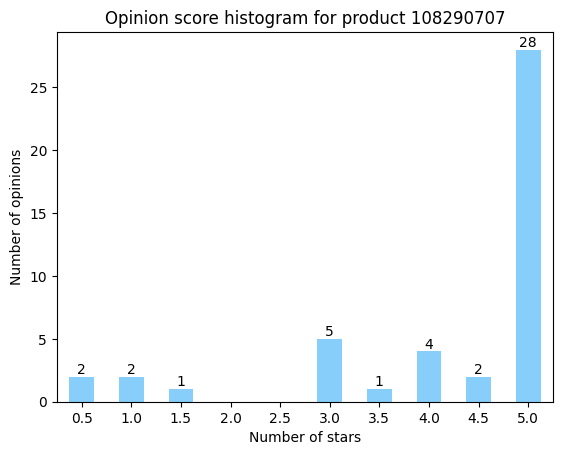

In [67]:
score_distribution = opinions.stars.value_counts().reindex(np.arange(0.5,5.5,0.5))
fig, ax = plt.subplots()
score_distribution.plot.bar(color="lightskyblue")
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l: int(l) if l > 0 else '')
ax.set_xlabel("Number of stars")
ax.set_ylabel("Number of opinions")
ax.set_title(f"Opinion score histogram for product {product_id}")
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

### Opinions recommendations share

Text(0.5, 1.0, 'Opinions recommendations share for product 108290707')

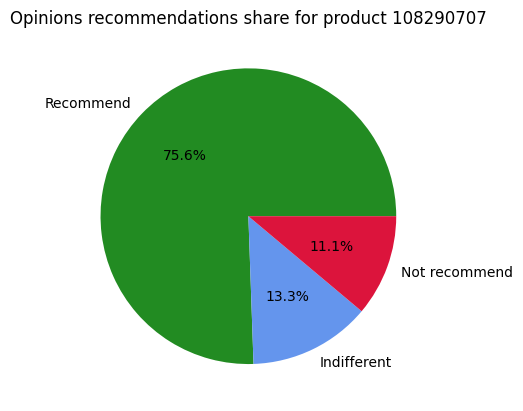

In [85]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex([1,np.nan,0])
fig, ax = plt.subplots()
recommendation_distribution.plot.pie(
    autopct = "%1.1f%%",
    labels = ["Recommend", "Indifferent", "Not recommend"],
    label = "",
    colors = ["forestgreen",'cornflowerblue','crimson']
)
ax.set_title(f"Opinions recommendations share for product {product_id}")